## Observations and Insights 

* Within the drug regimen of Capomulin, the weight of each mouse is highly correlated with the mean size of its tumor (averaged over all the observed timepoints).  This is worth noting because the average size may be less affected by the drug itself.

* Mouse # x401 demonstrates a clear downward trend in tumor size through its timepoints.

* Ramicane and Capomulin treatments seem to result in a smaller final tumor size than Infubinol and Ceftamin.  The first two result in approximately a 37% decrease in tumor volume in comparison to the latter two.

In [1]:
#%matplotlib notebook
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np


# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)
print(mouse_metadata.head(2))
print(study_results.head(2))

# Combine the data into a single dataset
study_mouse_df = pd.merge(mouse_metadata, study_results, how='inner')

# Display the data table for preview
study_mouse_df

  Mouse ID Drug Regimen     Sex  Age_months  Weight (g)
0     k403     Ramicane    Male          21          16
1     s185    Capomulin  Female           3          17
  Mouse ID  Timepoint  Tumor Volume (mm3)  Metastatic Sites
0     b128          0                45.0                 0
1     f932          0                45.0                 0


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [2]:
# Checking the number of mice.
mouse_metadata['Mouse ID'].count()

249

In [3]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
duplicate_rows = study_mouse_df.loc[study_mouse_df.duplicated(subset=["Mouse ID","Timepoint"],keep='first'),:]
duplicate_rows


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
909,g989,Propriva,Female,21,26,0,45.000000,0
911,g989,Propriva,Female,21,26,5,47.570392,0
913,g989,Propriva,Female,21,26,10,49.880528,0
915,g989,Propriva,Female,21,26,15,53.442020,0
917,g989,Propriva,Female,21,26,20,54.657650,1


In [4]:
# Optional: Get all the data for the duplicate mouse ID. 
# Performed above.


In [5]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
no_dupes_df = study_mouse_df.drop_duplicates(subset=["Mouse ID","Timepoint"])
len(no_dupes_df)


1888

In [6]:
# Checking the number of mice in the clean DataFrame.
len(no_dupes_df['Mouse ID'].unique())

# What I've elected to do is strip just the duplicated data (based on Mouse ID and Timepoint), rather than
# all records (both original and duplicated) of the duplicated mouse.  This means the same number of total mice,
# but no duplicate records.  I did notice that the tumor volume changes between the duplicate records, so it may
# have been measured twice at the same recorded timepoint.


249

## Summary Statistics

In [7]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

'''no_dupes_df.agg({
    "Age_months":['mean','median','variance','std','sem']
})'''

regimen_group = no_dupes_df.groupby('Drug Regimen')
tumor_mean = regimen_group.mean()
tumor_mean = tumor_mean.rename(columns={'Tumor Volume (mm3)':'Mean'})
#tumor_mean[['Tumor Volume (mm3)']]

tumor_median = regimen_group.median()
tumor_median = tumor_median.rename(columns={'Tumor Volume (mm3)':'Median'})

tumor_variance = regimen_group.var()
tumor_variance = tumor_variance.rename(columns={'Tumor Volume (mm3)':'Variance'})

tumor_std = regimen_group.std()
tumor_std = tumor_std.rename(columns={'Tumor Volume (mm3)':'Std Deviation'})

tumor_sem = regimen_group.sem()
tumor_sem = tumor_sem.rename(columns={'Tumor Volume (mm3)':'Std Err of Means'})


reg_summary = pd.merge(tumor_mean[['Mean']], tumor_median[['Median']], on="Drug Regimen")
reg_summary = pd.merge(reg_summary, tumor_variance[['Variance']], on="Drug Regimen")
reg_summary = pd.merge(reg_summary, tumor_std[['Std Deviation']], on="Drug Regimen")
reg_summary = pd.merge(reg_summary, tumor_sem[['Std Err of Means']], on="Drug Regimen")
reg_summary

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary dataframe.



,Mean,Median,Variance,Std Deviation,Std Err of Means
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.393463,50.909965,43.138803,6.568014,0.525862
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [8]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Using the aggregation method, produce the same summary statistics in a single line

regimen_group.agg({
    'Tumor Volume (mm3)':['mean', 'median', 'var', 'std', 'sem']
}).round(3)


Tumor Volume (mm3)                              
                           mean  median     var    std    sem
Drug Regimen                                                 
Capomulin                40.676  41.558  24.948  4.995  0.329
Ceftamin                 52.591  51.776  39.290  6.268  0.470
Infubinol                52.885  51.821  43.129  6.567  0.492
Ketapril                 55.236  53.699  68.554  8.280  0.604
Naftisol                 54.332  52.509  66.173  8.135  0.596
Placebo                  54.034  52.289  61.168  7.821  0.581
Propriva                 52.393  50.910  43.139  6.568  0.526
Ramicane                 40.217  40.673  23.487  4.846  0.321
Stelasyn                 54.233  52.432  59.451  7.710  0.573
Zoniferol                53.237  51.818  48.533  6.967  0.516

## Bar and Pie Charts

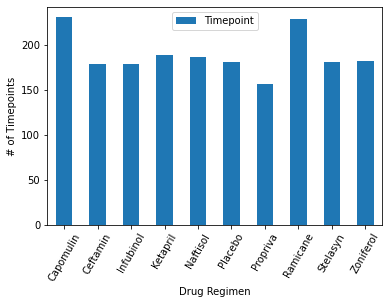

In [9]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using Pandas.

timepoint_counts = regimen_group[['Timepoint']].count()

timepoint_counts.plot(kind='bar',rot=60, ylabel='# of Timepoints')

plt.show()

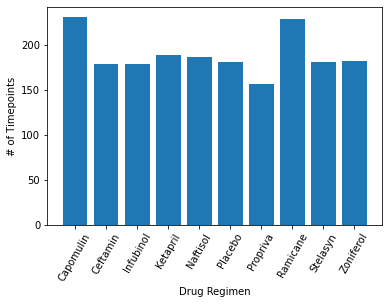

In [10]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using pyplot.
timepoint_counts = timepoint_counts.reset_index()
plt.bar(timepoint_counts['Drug Regimen'], timepoint_counts['Timepoint'])
plt.xlabel("Drug Regimen")
plt.ylabel("# of Timepoints")
plt.xticks(rotation=60)
plt.show()

array([<AxesSubplot:ylabel='Count'>], dtype=object)

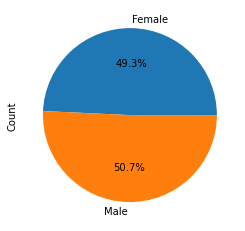

In [11]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas
mouse_sex_group_df = no_dupes_df.groupby(['Sex'])
mouse_sex_count_df = mouse_sex_group_df.count()
#mouse_sex_count_df = mouse_sex_count_df.reset_index()
mouse_sex_reduced = mouse_sex_count_df[['Mouse ID']]
mouse_sex_reduced = mouse_sex_reduced.rename(columns={'Mouse ID':'Count'})
#mouse_sex_reduced
mouse_sex_reduced.plot(kind='pie', subplots=True, legend=False, autopct='%1.1f%%')


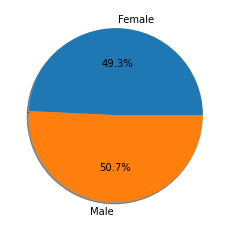

In [12]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
#label = ['Female','Male']

plt.pie(mouse_sex_reduced['Count'], labels=mouse_sex_reduced.index.values, autopct="%1.1f%%", shadow=True)

plt.show()


## Quartiles, Outliers and Boxplots

In [13]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin
filter_list = ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']
four_drugs_df = no_dupes_df.loc[no_dupes_df['Drug Regimen'].isin(filter_list)]
# four_drugs_df['Drug Regimen'].unique()
# output: array(['Ramicane', 'Capomulin', 'Infubinol', 'Ceftamin'], dtype=object)

# Start by getting the last (greatest) timepoint for each mouse
last_timepoint_group = four_drugs_df[['Mouse ID', 'Timepoint']].groupby(['Mouse ID'])
last_timepoint_df = last_timepoint_group.max()
last_timepoint_df = last_timepoint_df.rename(columns={'Timepoint':'Last Timepoint'})
last_timepoint_df


# Merge this group df with the original dataframe to get the tumor volume at the last timepoint
four_drugs_and_last_timepoint = pd.merge(four_drugs_df, last_timepoint_df, on='Mouse ID')
tumor_size_at_last_timepoint = four_drugs_and_last_timepoint.loc[
    four_drugs_and_last_timepoint['Timepoint'] == four_drugs_and_last_timepoint['Last Timepoint']
]
tumor_size_at_last_timepoint.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites,Last Timepoint
9,k403,Ramicane,Male,21,16,45,22.050126,1,45
19,s185,Capomulin,Female,3,17,45,23.343598,1,45
29,x401,Capomulin,Female,16,15,45,28.484033,0,45
39,m601,Capomulin,Male,22,17,45,28.430964,1,45
49,g791,Ramicane,Male,11,16,45,29.128472,1,45


In [14]:
# Put treatments into a list for for loop (and later for plot labels)
treatment_list = tumor_size_at_last_timepoint['Drug Regimen'].unique()
treatment_dict = {}

# treatment_dict: {'drug regimen':[list of tumor sizes]}, contains all 4 drugs in same order as list
for treatment in treatment_list:
    temp_list = tumor_size_at_last_timepoint['Tumor Volume (mm3)'].loc[tumor_size_at_last_timepoint['Drug Regimen'] == treatment]
    treatment_dict[treatment] = temp_list

# Create empty list to fill with tumor vol data (for plotting)


# Calculate the IQR and quantitatively determine if there are any potential outliers. 

outliers_all = []

for treatment in treatment_list:
    outliers=[]
    quartiles = treatment_dict[treatment].quantile([.25,.5,.75])
    lowerq = quartiles[0.25]
    upperq = quartiles[0.75]
    iqr = upperq-lowerq
    lower_bound = lowerq - (1.5*iqr)
    upper_bound = upperq + (1.5*iqr)

    print(f'For {treatment}, values outside {lower_bound.round(2)} to {upper_bound.round(2)} may be outliers, listed below:')
    temp_list = treatment_dict[treatment]
    for tumor in temp_list:
        if (tumor < lower_bound) | (tumor > upper_bound):
            outliers.append(tumor)
    print(outliers)
    outliers_all.append(outliers)
print(f"All known potential outlier tumor values:")
#print(outliers_all)
four_drugs_and_last_timepoint.loc[four_drugs_and_last_timepoint['Tumor Volume (mm3)'].isin(outliers_all[2])]
# There seems to be just one value which is an outlier.  It's in Infubinol, and the value is 36.32

# Locate the rows which contain mice on each drug and get the tumor volumes
# All contained within treatment_dict and the relevant dataframe.

# add subset 


# Determine outliers using upper and lower bounds


For Ramicane, values outside 17.91 to 54.31 may be outliers, listed below:
[]
For Capomulin, values outside 20.7 to 51.83 may be outliers, listed below:
[]
For Infubinol, values outside 36.83 to 82.74 may be outliers, listed below:
[36.3213458]
For Ceftamin, values outside 25.36 to 87.67 may be outliers, listed below:
[]
All known potential outlier tumor values:


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites,Last Timepoint
526,c326,Infubinol,Female,18,25,5,36.321346,0,5


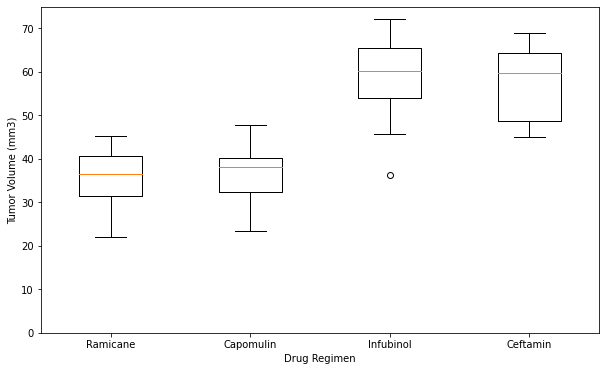

,Tumor Volume (mm3)
Drug Regimen,
Capomulin,36.667568
Ceftamin,57.753977
Infubinol,58.178246
Ramicane,36.191390


In [96]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest
plot_list = []
for key in treatment_dict:
    plot_list.append(treatment_dict[key])
plt.boxplot(plot_list, labels=treatment_list)
plt.xlabel("Drug Regimen")
plt.rcParams["figure.figsize"] = (10,6)
plt.ylabel("Tumor Volume (mm3)")
plt.ylim(0,75)
plt.show()

group_tumor_size_df = tumor_size_at_last_timepoint.groupby(['Drug Regimen'])
mean_final_tumor_size = group_tumor_size_df.mean()
mean_final_tumor_size[['Tumor Volume (mm3)']]

## Line and Scatter Plots

<AxesSubplot:xlabel='Timepoint', ylabel='Tumor Volume (mm3)'>

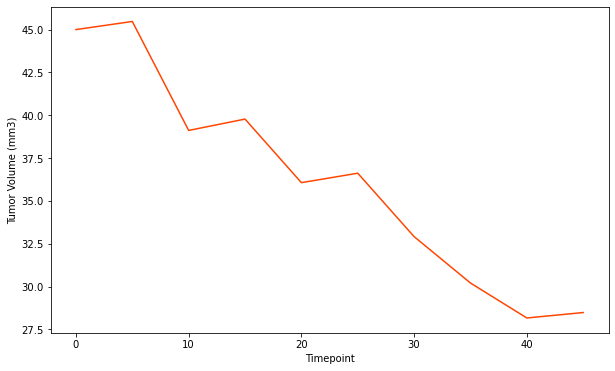

In [62]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin
x401_df = no_dupes_df[['Timepoint','Tumor Volume (mm3)']].loc[no_dupes_df['Mouse ID']=='x401']
x401_df = x401_df.set_index('Timepoint')
x401_df.plot(kind="line", ylabel='Tumor Volume (mm3)', legend=False, color='orangered', figsize = (10,6))

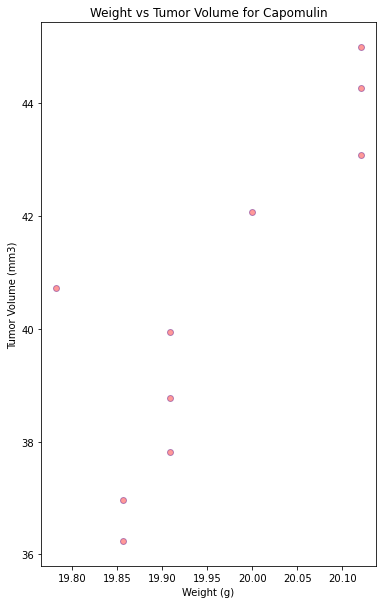

In [63]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen
tumor_vs_weight = no_dupes_df[['Weight (g)', 'Tumor Volume (mm3)','Timepoint']].loc[no_dupes_df['Drug Regimen']=='Capomulin']
tumor_vs_weight_group = tumor_vs_weight.groupby(['Timepoint'])
tumor_weight_avg = tumor_vs_weight_group.mean()

plt.scatter(tumor_weight_avg['Weight (g)'], tumor_weight_avg['Tumor Volume (mm3)'],
            marker='o', edgecolors = 'indigo', facecolors='red', alpha = 0.4)
plt.xlabel("Weight (g)")
plt.ylabel("Tumor Volume (mm3)")
plt.title("Weight vs Tumor Volume for Capomulin")
plt.rcParams["figure.figsize"] = (10,10)
plt.show()


## Correlation and Regression

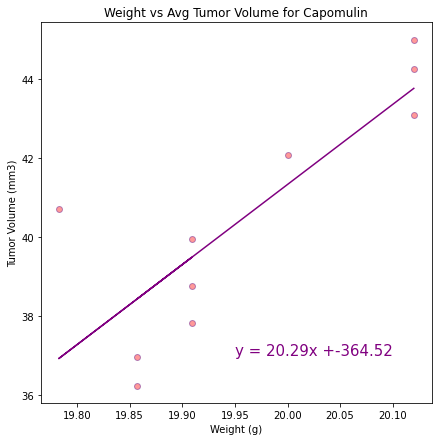

The correlation coefficient for weight vs avg tumor size with Capomulin is 0.821
The linear regression equation is: y = 20.29x +-364.52


In [47]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen


# Correlation calculations:
weights = tumor_weight_avg['Weight (g)']
tumors = tumor_weight_avg['Tumor Volume (mm3)']
correlation = st.pearsonr(weights, tumors)


plt.scatter(tumor_weight_avg['Weight (g)'], tumor_weight_avg['Tumor Volume (mm3)'],
            marker='o', edgecolors = 'indigo', facecolors='red', alpha = 0.4)
plt.xlabel("Weight (g)")
plt.ylabel("Tumor Volume (mm3)")
plt.title("Weight vs Avg Tumor Volume for Capomulin")

(slope, intercept, rvalue, pvalue, stderr) = st.linregress(weights, tumors)
regress_values = weights * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))
plt.plot(weights,regress_values, color='purple')
plt.annotate(line_eq,(19.95,37),fontsize=15,color="purple")
plt.rcParams["figure.figsize"] = (7,7)

plt.show()


print("The correlation coefficient for weight vs avg tumor size with Capomulin is " + str(correlation[0].round(3)))
print("The linear regression equation is: " + line_eq)